<a href="https://colab.research.google.com/github/teodorachiriac73/PMP-2024/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

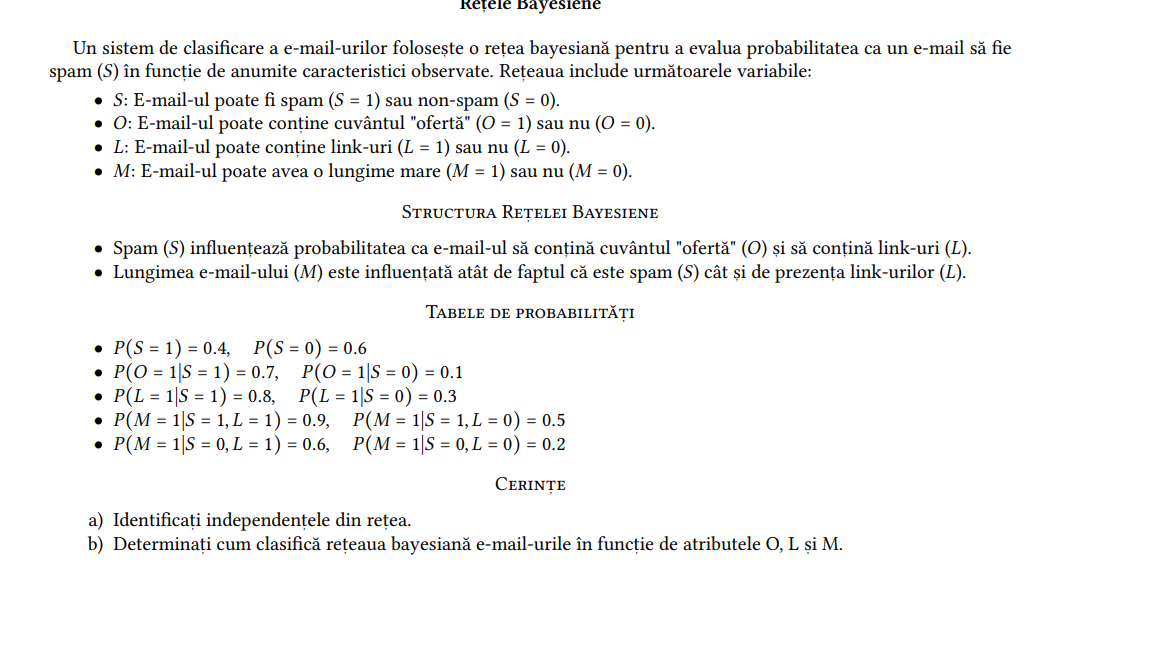

# a. Independente
1. S influenteaza direct O si L, insa O si L sunt independente
2. S si L influenteaza M, aici nu avem nicio independenta

# b. Clasificare de mailuri
Teoretic : P(S=1|O,L,M)= P(O,L,M|S=1)*P(S=1)/P(O,L,M)
P(O,L,M)=P(O,L,M|S=1)* P(S=1) + P(O,L,M|S=0)* P(S=0)
#### Calculam
P(O,L,M|S=1)=P(O|S=1)P(L|S=1)P(M|S=1,L)= 0.7*0.8*0.9 ~ 0.50
P(O,L,M|S=0)=P(O|S=0)P(L|S=0)P(M|S=0,L)= 0.1*0.3*0.6 ~0.01

Adica P(O,L,M) = 0.50*0.4 + 0.01*0.6
Deci P(S=1|O,L,M)=  0.5 * 0.4 / (0.50*0.4 + 0.01*0.6)

In [7]:



model = BayesianNetwork([('S', 'O'), ('S', 'L'), ('S', 'M'), ('L', 'M')])
cpd_s = TabularCPD(variable='S', variable_card=2, values=[[0.6], [0.4]])
cpd_o = TabularCPD(variable='O', variable_card=2, values=[[1-0.1, 1-0.7],  #P(O=0|S=0),P(O=0|S=1)
                           [0.1, 0.7]],  # P(O=1|S=0), P(O=1|S=1)
                   evidence=['S'], evidence_card=[2])
cpd_l = TabularCPD(variable='L', variable_card=2,
                   values=[[0.7, 0.2],  # P(L=0|S=0), P(L=0|S=1)
                           [0.3, 0.8]],  # P(L=1|S=0), P(L=1|S=1)
                   evidence=['S'], evidence_card=[2])
cpd_m = TabularCPD(variable='M', variable_card=2,
                   values=[[0.8, 0.5, 0.4, 0.1],  #M=0
                           [0.2, 0.5, 0.6, 0.9]],  #M=1
                   evidence=['S', 'L'], evidence_card=[2, 2])

model.add_cpds(cpd_s, cpd_o, cpd_l, cpd_m)
assert model.check_model()

infer = VariableElimination(model)
result = infer.query(variables=['S'], evidence={'O': 1,'M':1,'L':1})
print(result)

+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.0427 |
+------+----------+
| S(1) |   0.9573 |
+------+----------+


In [6]:
!apt install libgraphviz-dev
!pip install pygraphviz
!pip install networkx
!pip install pgmpy

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 49 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgail18 amd64 2.24.33-2ubuntu2.1 [15.9 kB]
Get:4 http://archive.ubun